In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset
training_set = pd.read_csv('mitbih_train.csv')
training_set.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


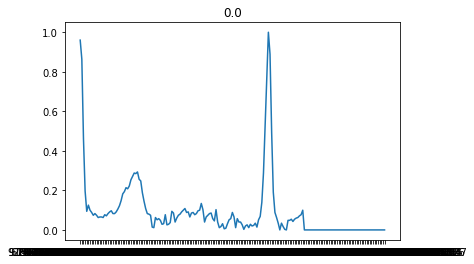

In [3]:
plt.plot(training_set.iloc[0, :-1])
plt.title(training_set.iloc[0, -1])
plt.show()

In [4]:
training_set.iloc[:, -1].value_counts()

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 0.000000000000000000e+00.88, dtype: int64

In [5]:
X = np.expand_dims(np.array(training_set.iloc[:, :-1]), 2)
Y = training_set.iloc[:, -1]
from keras.utils import to_categorical
Y = to_categorical(Y)
pd.DataFrame(Y).head()

Using TensorFlow backend.


,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [6]:
X.shape

(87553, 187, 1)

In [7]:
from keras.models import Sequential
from keras.layers import *

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, strides=1, input_shape=(187, 1)))

model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu', padding='same'))
model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=5, strides=2))

for i in range(3):
    model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu', padding='same'))
    model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 183, 32)           192       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 183, 32)           5152      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 183, 32)           5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 90, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 90, 32)            5152      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 90, 32)            5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 43, 32)            0         
______

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
testset = pd.read_csv('mitbih_test.csv')
X_test = np.expand_dims(np.array(testset.iloc[:, :-1]), 2)
Y_test = to_categorical(testset.iloc[:, -1])

model.fit(X, Y, epochs=50, batch_size=100, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 87553 samples, validate on 21891 samples
Epoch 1/50
87553/87553 [==============================] - 65s 739us/step - loss: 0.2997 - acc: 0.9170 - val_loss: 0.1921 - val_acc: 0.9462
Epoch 2/50
87553/87553 [==============================] - 8s 87us/step - loss: 0.1378 - acc: 0.9609 - val_loss: 0.1205 - val_acc: 0.9668
Epoch 3/50
87553/87553 [==============================] - 8s 86us/step - loss: 0.1082 - acc: 0.9699 - val_loss: 0.0967 - val_acc: 0.9732
Epoch 4/50
87553/87553 [==============================] - 8s 86us/step - loss: 0.0937 - acc: 0.9735 - val_loss: 0.0912 - val_acc: 0.9750
Epoch 5/50
87553/87553 [==============================] - 8s 86us/step - loss: 0.0811 - acc: 0.9769 - val_loss: 0.1170 - val_acc: 0.9656
Epoch 6/50
87553/87553 [==============================] - 8s 86us/step - loss: 0.0734 - acc: 0.9791 - val_loss: 0.0870 - val_acc: 0.9766
Epoch 7/50
87553/87553 [=======

In [10]:
Y_pred = model.predict(X_test)

In [11]:
Y_pred1 = np.array(Y_pred).argmax(axis=1)

In [12]:
Y_test = np.array(Y_test).argmax(axis=1)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred1)

In [14]:
pd.DataFrame(cm)

,0,1,2,3,4
0,17980,53,39,10,35
1,98,443,13,0,2
2,29,3,1398,14,4
3,29,0,15,116,2
4,11,1,3,0,1593


In [15]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[17980    53    39    10    35]
 [   98   443    13     0     2]
 [   29     3  1398    14     4]
 [   29     0    15   116     2]
 [   11     1     3     0  1593]]


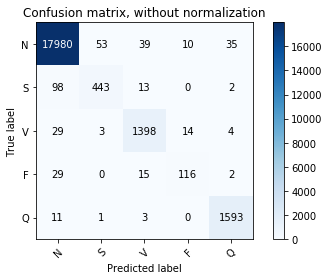

In [16]:
plot_confusion_matrix(Y_test, Y_pred1, classes=['N', 'S', 'V', 'F', 'Q'], title='Confusion matrix, without normalization')

Normalized confusion matrix
[[9.92438042e-01 2.92542915e-03 2.15267428e-03 5.51967765e-04
  1.93188718e-03]
 [1.76258993e-01 7.96762590e-01 2.33812950e-02 0.00000000e+00
  3.59712230e-03]
 [2.00276243e-02 2.07182320e-03 9.65469613e-01 9.66850829e-03
  2.76243094e-03]
 [1.79012346e-01 0.00000000e+00 9.25925926e-02 7.16049383e-01
  1.23456790e-02]
 [6.84079602e-03 6.21890547e-04 1.86567164e-03 0.00000000e+00
  9.90671642e-01]]


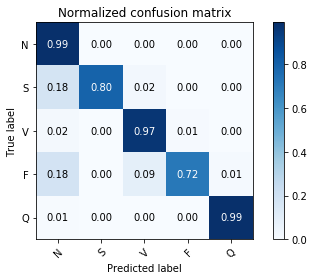

In [17]:
plot_confusion_matrix(Y_test, Y_pred1, classes=['N', 'S', 'V', 'F', 'Q'], normalize=True,
                      title='Normalized confusion matrix')

In [18]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')
print('Model saved!')

Model saved!
